In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('adult.csv', header=None, index_col=False,
                   names=['年龄','单位性质','权重','学历','受教育时长','婚姻状况','职业','家庭状况','种族','性别',
                          '资产所得','资产损失','周工作时长','原籍','收入'])

data_dummies = pd.get_dummies(data)

features = data_dummies.loc[:,'年龄':'原籍_ Yugoslavia']

X = features.values
y = data_dummies['收入_ >50K'].values

In [2]:
print(X.shape)
print(y.shape)

(32561, 108)
(32561,)


In [3]:
import numpy as np

pos = 0
neg = 0

for i in range(0, 32561):
    if(y[i] == 1):
        pos = pos + 1
    else:
        neg = neg + 1

print('pos =', pos)
print('neg =', neg)

pos = 7841
neg = 24720


In [4]:
pos = 0
neg = 0

X_pos = np.zeros(shape = (7841,108), dtype = int)
X_neg = np.zeros(shape = (24720,108), dtype = int)
y_pos = np.zeros(shape = (7841,), dtype = int)
y_neg = np.ones(shape = (24720,), dtype = int)

for i in range(0, 32561):
    if(y[i] == 1):
        X_pos[pos] = X[i]
        pos = pos + 1
    else:
        X_neg[neg] = X[i]
        neg = neg + 1

In [5]:
pospl = (int)(pos/10)
negpl = (int)(neg/10)
pl = pospl + negpl

print('pospl =', pospl)
print('negpl =', negpl)
print('pl =', pl)

pospl = 784
negpl = 2472
pl = 3256


In [6]:
from sklearn.svm import SVC

svc = SVC()

In [7]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

In [10]:
scores = np.zeros(shape = (10,))

for i in range(0, 10):
    for j in range(0, 10):
        if(i != j):
            sgd.fit(np.append(X_pos[pospl * j : pospl * (j + 1)], X_neg[negpl * j : negpl * (j + 1)], axis = 0),
                    np.append(y_pos[pospl * j : pospl * (j + 1)], y_neg[negpl * j : negpl * (j + 1)], axis = 0))
    scores[i] = sgd.score(np.append(X_pos[pospl * i : pospl * (i + 1)], X_neg[negpl * i : negpl * (i + 1)], axis = 0),
                          np.append(y_pos[pospl * i : pospl * (i + 1)], y_neg[negpl * i : negpl * (i + 1)], axis = 0))

print(scores)

score_sum = 0

for i in range(0, 10):
    score_sum = score_sum + scores[i]

score_mean = score_sum / 10

print(score_mean)

[0.78931204 0.79514742 0.78839066 0.79422604 0.78777641 0.78746929
 0.78286241 0.24078624 0.79054054 0.79453317]
0.7351044226044225


In [11]:
import warnings

warnings.filterwarnings('ignore')

scores = np.zeros(shape = (10,))

for i in range(0, 10):
    for j in range(0, 10):
        if(i != j):
            svc.fit(np.append(X_pos[pospl * j : pospl * (j + 1)], X_neg[negpl * j : negpl * (j + 1)], axis = 0),
                    np.append(y_pos[pospl * j : pospl * (j + 1)], y_neg[negpl * j : negpl * (j + 1)], axis = 0))
    scores[i] = svc.score(np.append(X_pos[pospl * i : pospl * (i + 1)], X_neg[negpl * i : negpl * (i + 1)], axis = 0),
                          np.append(y_pos[pospl * i : pospl * (i + 1)], y_neg[negpl * i : negpl * (i + 1)], axis = 0))

print(scores)

score_sum = 0

for i in range(0, 10):
    score_sum = score_sum + scores[i]

score_mean = score_sum / 10

print(score_mean)

[0.75952088 0.75829238 0.75829238 0.75829238 0.75767813 0.76013514
 0.75921376 0.75982801 0.76013514 0.76074939]
0.7592137592137592


In [18]:
svc.fit(X, y)
y_scores = svc.decision_function(X)

print(y_scores)

y_sss = (y_scores + 1) /2

for i in range(0, 32561):
    if(y_sss[i] < 0):
        y_sss[i] = 0
    if(y_sss[i] > 1):
        y_sss[i] = 1

print(y)        
print(y_sss)

c:\users\zhenm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[-0.99980744 -0.99976772 -0.99986222 ... -1.00006587 -1.00003594
  0.32301813]
[0 0 0 ... 0 0 1]
[9.62786181e-05 1.16138377e-04 6.88888180e-05 ... 0.00000000e+00
 0.00000000e+00 6.61509065e-01]


In [17]:
sgd.fit(X, y)
sgd_y_scores = sgd.decision_function(X)

print(sgd_y_scores)

sgd_y_sss = sgd_y_scores / 100000000
sgd_y_sss = (sgd_y_sss + 1) / 2

for i in range(0, 32561):
    if(sgd_y_sss[i] < 0):
        sgd_y_sss[i] = 0
    if(sgd_y_sss[i] > 1):
        sgd_y_sss[i] = 1

print(y)
print(sgd_y_sss)

[3.32527200e+07 2.59994972e+07 6.66740402e+07 ... 4.72499751e+07
 6.21052977e+07 1.50778290e+08]
[0 0 0 ... 0 0 1]
[0.6662636  0.62999749 0.8333702  ... 0.73624988 0.81052649 1.        ]


In [40]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(0, 32561):
    if(y[i] == 1):
        if(y_predict[i] == 1):
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if(y_predict[i] == 1):
            FP = FP + 1
        else:
            TN = TN + 1

print(TP, ' ', FN)
print(FP, ' ', TN)

2438   5403
1269   23451


In [19]:
y_set = np.ones(shape = (32561,), dtype = int)

y_TP = np.zeros(shape = (11,), dtype = int)
y_TN = np.zeros(shape = (11,), dtype = int)
y_FP = np.zeros(shape = (11,), dtype = int)
y_FN = np.zeros(shape = (11,), dtype = int)

for t in range(0, 11):
    th = 1 - 0.1 * t
    for i in range(0, 32561):
        if(y_sss[i] < th):
            y_set[i] = 0
        else:
            y_set[i] = 1
    
    for j in range(0, 32561):
        if(y[j] == 1):
            if(y_set[j] == 1):
                y_TP[t] = y_TP[t] + 1
            else:
                y_FN[t] = y_FN[t] + 1
        else:
            if(y_set[j] == 1):
                y_FP[t] = y_FP[t] + 1
            else:
                y_TN[t] = y_TN[t] + 1
            
print('TP:')
print(y_TP)
print()
print('TN:')
print(y_TN)
print()
print('FP:')
print(y_FP)
print()
print('FN:')
print(y_FN)

TP:
[ 179  597  896 1252 6057 6602 6889 7160 7503 7723 7841]

TN:
[24720 24713 24708 24702 24689 24667 24637 24582 24517 24342     0]

FP:
[    0     7    12    18    31    53    83   138   203   378 24720]

FN:
[7662 7244 6945 6589 1784 1239  952  681  338  118    0]


In [20]:
y_P = np.zeros(shape = (11,), dtype = float)
y_R = np.zeros(shape = (11,), dtype = float)
y_F1 = np.zeros(shape = (11,), dtype = float)

for i in range(0, 11):
    y_P[i] = y_TP[i]/(y_TP[i] + y_FP[i])
    y_R[i] = y_TP[i]/(y_TP[i] + y_FN[i])
    y_F1[i] = (2 * y_P[i] * y_R[i])/(y_P[i] + y_R[i])
    
print(y_P)
print()
print(y_R)
print()
print(y_F1)

[1.         0.9884106  0.98678414 0.98582677 0.99490802 0.99203606
 0.98809524 0.98109071 0.97365689 0.95333909 0.24080956]

[0.02282872 0.07613825 0.11427114 0.15967351 0.772478   0.84198444
 0.87858691 0.91314883 0.95689325 0.9849509  1.        ]

[0.0446384  0.14138544 0.20482341 0.27483262 0.86969632 0.91087196
 0.93012894 0.94590131 0.96520229 0.96888722 0.3881491 ]


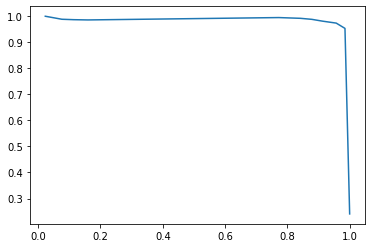

In [22]:
import matplotlib.pyplot as plt

plt.plot(y_R,y_P)

In [23]:
y_TPR = np.zeros(shape = (11,), dtype = float)
y_FPR = np.zeros(shape = (11,), dtype = float)

for i in range(0, 11):
    y_TPR[i] = y_TP[i]/(y_TP[i] + y_FN[i])
    y_FPR[i] = y_FP[i]/(y_TN[i] + y_FP[i])
    
print(y_TPR)
print()
print(y_FPR)

[0.02282872 0.07613825 0.11427114 0.15967351 0.772478   0.84198444
 0.87858691 0.91314883 0.95689325 0.9849509  1.        ]

[0.00000000e+00 2.83171521e-04 4.85436893e-04 7.28155340e-04
 1.25404531e-03 2.14401294e-03 3.35760518e-03 5.58252427e-03
 8.21197411e-03 1.52912621e-02 1.00000000e+00]


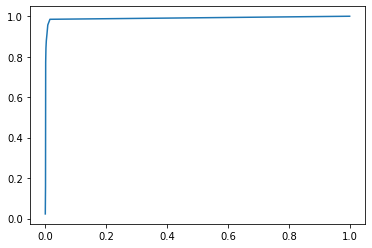

In [24]:
plt.plot(y_FPR,y_TPR)

In [25]:
AUC = 0

for i in range(0, 10):
    AUC = AUC + (((y_FPR[i + 1] - y_FPR[i]) * (y_TPR[i + 1] + y_TPR[i])) / 2)

print(AUC)

0.990698573674433
